<a href="https://www.kaggle.com/code/parisrohan/customer-churn-prediction?scriptVersionId=94966037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
# Load required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

In [3]:
df_data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_data.shape

(7043, 21)

In [6]:
#Check for null values
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Feature description:
* 'customerID': Customer ID
* 'gender': Whether the customer is a male or a female
* 'SeniorCitizen': Whether the customer is a senior citizen or not (1, 0)
* 'Partner': Whether the customer has a partner or not (Yes, No)
* 'Dependents': Whether the customer has dependents or not (Yes, No)
* 'tenure': Number of months the customer has stayed with the company
* 'PhoneService': Whether the customer has a phone service or not (Yes, No)
* 'MultipleLines': Whether the customer has multiple lines or not (Yes, No, No phone service)
* 'InternetService': Customer’s internet service provider (DSL, Fiber optic, No)
* 'OnlineSecurity': Whether the customer has online security or not (Yes, No, No internet service)
* 'OnlineBackup': Whether the customer has online backup or not (Yes, No, No internet service)
* 'DeviceProtection': Whether the customer has device protection or not (Yes, No, No internet service)
* 'TechSupport': Whether the customer has tech support or not (Yes, No, No internet service)
* 'StreamingTV': Whether the customer has streaming TV or not (Yes, No, No internet service)
* 'StreamingMovies': Whether the customer has streaming movies or not (Yes, No, No internet service)
* 'Contract': The contract term of the customer (Month-to-month, One year, Two year)
* 'PaperlessBilling': Whether the customer has paperless billing or not (Yes, No)
* 'PaymentMethod': The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* 'MonthlyCharges': The amount charged to the customer monthly
* 'TotalCharges': The total amount charged to the customer
* 'Churn': Whether the customer churned or not (Yes or No)


* **'Churn' is the target feature**


### The feature 'TotalCharges' has float values but it's data type is object. So we will check on this.
First we will find the index positions that have the space(i.e missing value). Then we will replace the spaces with null value and convert the data-type of 'TotalCharges' feature to 'float64'. Next we will impute the missing values with the median value of this feature.

In [7]:
#Index of rows that have a blank space i.e. it is a null value
na_index = df_data[df_data['TotalCharges'].apply(lambda x: x.isspace())==True].index
print(na_index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [8]:
# Fill the 11 blank values with the np.nan
df_data['TotalCharges'] = df_data['TotalCharges'].replace(' ', np.nan)

#Convert to float type
df_data['TotalCharges'] = df_data['TotalCharges'].astype('float64')

In [9]:
#Replace the 11 missing values with median of the feature
df_data['TotalCharges']=df_data['TotalCharges'].fillna(df_data['TotalCharges'].median())

In [10]:
# Drop customerID feature as it is not required
df_data.drop('customerID', axis=1, inplace=True)

In [11]:
#Apart from 'SeniorCitizen' feature, all the other features have values like Yes/No. So we will map 0 to No and 1 to Yes for the 'SeniorCitizen' feature.
df_data['SeniorCitizen']=df_data['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [12]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check the data distribution of Target feature

<AxesSubplot:xlabel='Churn', ylabel='count'>

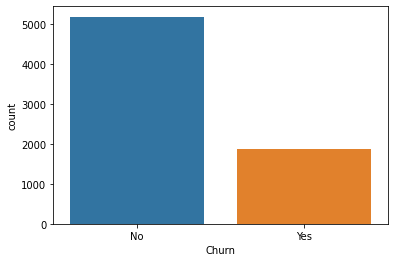

In [13]:
sns.countplot(x="Churn", data=df_data)

In [14]:
df_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### This is an imbalanced data as the number of 'No' is far greater than the number of 'Yes' in our dataset
#### 73% data is for 'No' and remaining 27% data is for 'Yes'

In [15]:
# Getting categorical and numerical features
cat_cols = [cname for cname in df_data.columns if df_data[cname].dtype=='object' and cname!='Churn']
num_cols = [cname for cname in df_data.columns if df_data[cname].dtype!='object']

print('categorical features: ', cat_cols)
print('numerical features: ', num_cols)

categorical features:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical features:  ['tenure', 'MonthlyCharges', 'TotalCharges']


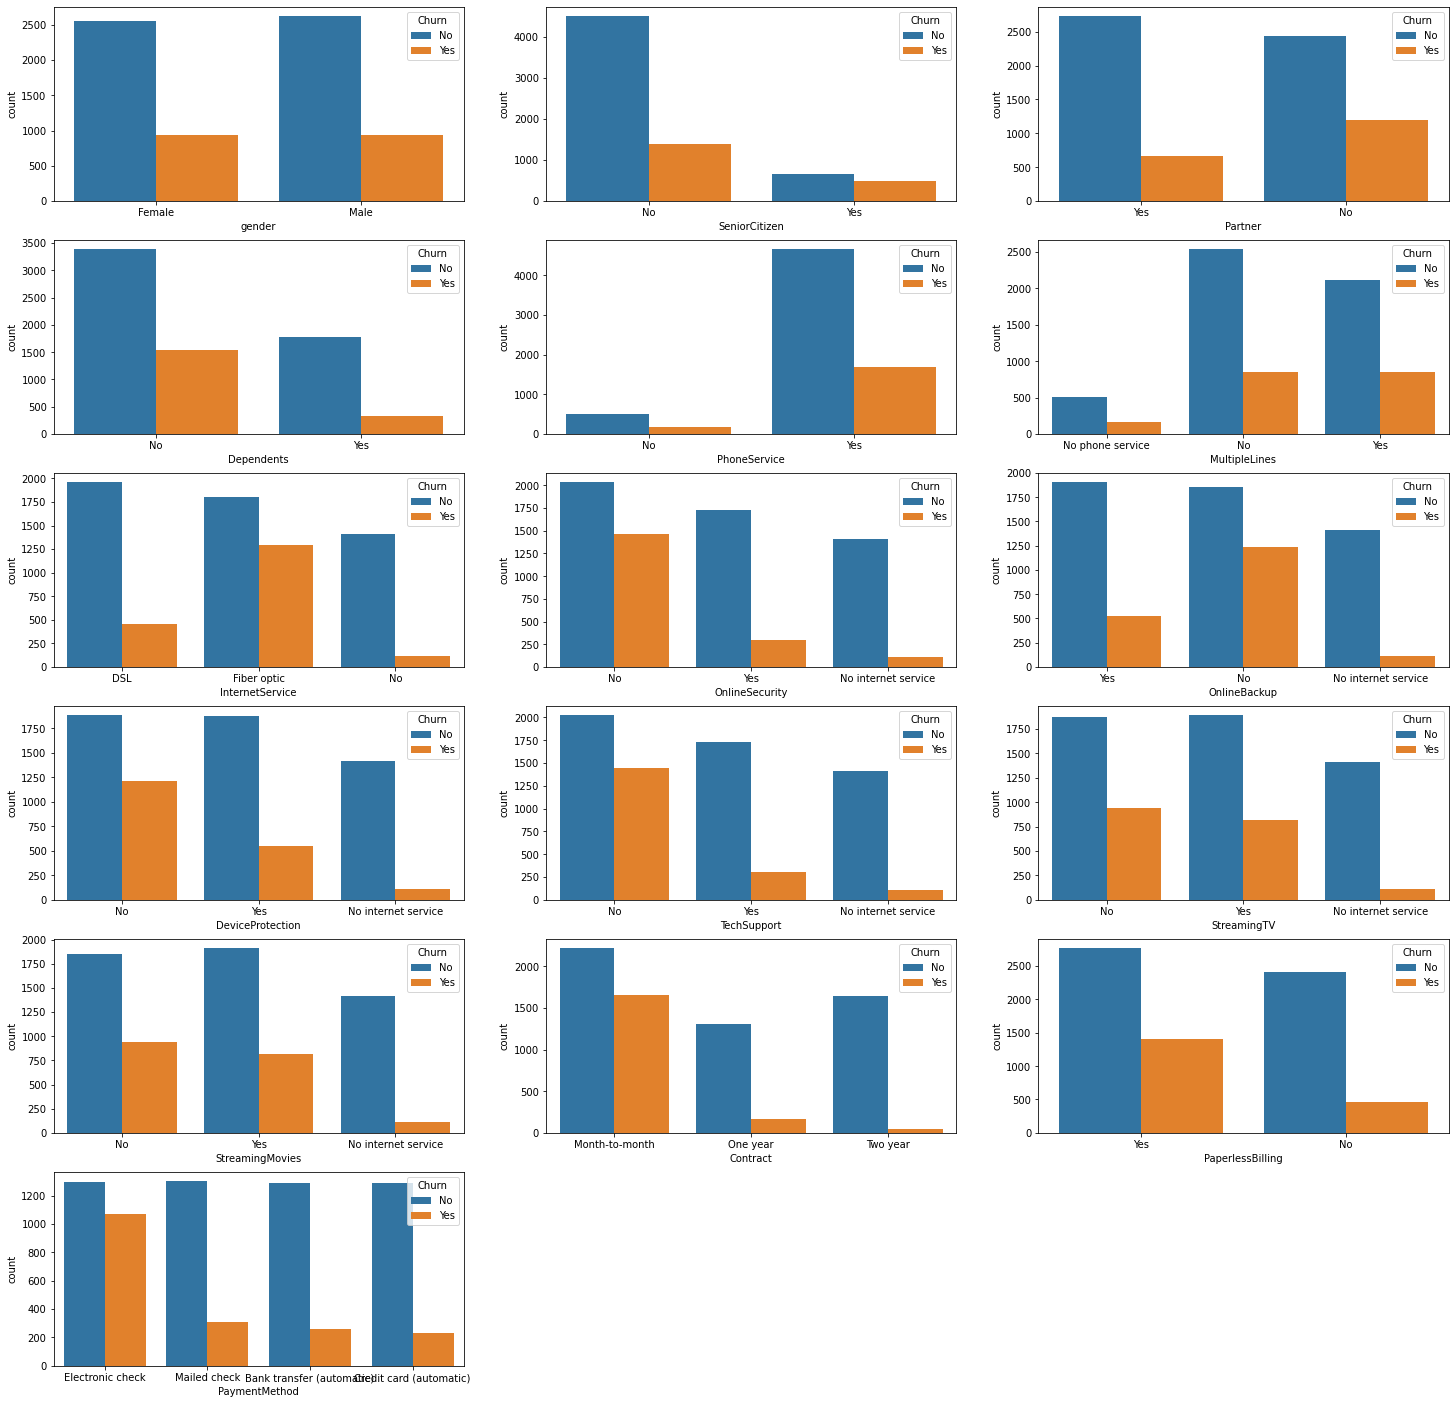

In [16]:
#Plotting the impact of categorical features on 'Churn'
plt.figure(figsize=(25,25))
for i,cat in enumerate(cat_cols):
    plt.subplot(6,3,i+1)
    sns.countplot(data = df_data, x= cat, hue = "Churn")
plt.show()

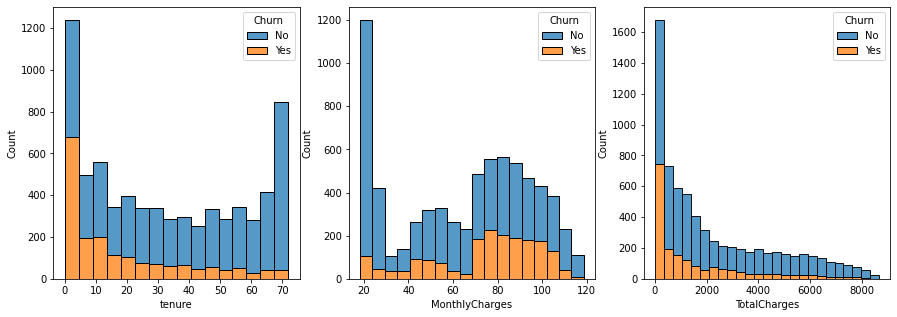

In [17]:
# Plotting the impact of continuous features on 'Churn'
plt.figure(figsize=(15,5))
for j,con in enumerate(num_cols):
    plt.subplot(1,3,j+1)
    sns.histplot(data = df_data, x= con, hue = "Churn", multiple="stack")
plt.show()